In [1]:
# Import dependencies. 

import pandas as pd
# import requests
# import json
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Import the API key
# from config_br import geoapify_key

In [2]:
# Read in the sample Miami dataset that includes our API calls for zip codes, school count, hospital count, restaurant count.

miami_all_sample = pd.read_csv("TESTING_Miami_merge.csv")
miami_all_sample.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,...,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,post_code,school count,hosp count,rest count
0,25.664650,-80.454970,3059080100500,391000.0,7096,3181,1280,7864.9,52246.5,41626.8,...,47379.1,22018.5,22,0,3,4,33196,2,1,0
1,25.851443,-80.175251,132080090270,420000.0,5555,1565,0,4070.8,18512.6,326.1,...,26516.6,10578.8,21,0,8,4,33138,6,6,10
2,25.539853,-80.386774,3069240001921,360000.0,46871,2400,194,11110.2,18526.1,10559.4,...,59032.3,3600.5,17,0,6,4,33032,0,0,0
3,25.821264,-80.380662,3530190022210,465000.0,4151,2253,3309,8771.4,57951.2,20335.1,...,47818.3,1899.8,19,0,4,5,33178,2,0,0
4,25.916466,-80.171423,722170181250,245000.0,4500,1318,1562,3212.8,16424.2,2745.2,...,47633.0,10676.0,21,0,12,4,33162,7,3,0


In [3]:
miami_all_sample["school count"].max()

21

In [4]:
school_bins = [0,1,5,10,25]

school_labels = ["Low","Medium-Low","Medium-High","High"]

In [5]:
# Use `pd.cut` to categorize schools based on the bins.
miami_all_sample["School Count Ranges"] = pd.cut(miami_all_sample["school count"], school_bins, labels=school_labels, include_lowest=True)
miami_all_sample

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,...,HWY_DIST,age,avno60plus,month_sold,structure_quality,post_code,school count,hosp count,rest count,School Count Ranges
0,25.664650,-80.454970,3059080100500,391000.0,7096,3181,1280,7864.9,52246.5,41626.8,...,22018.5,22,0,3,4,33196,2,1,0,Medium-Low
1,25.851443,-80.175251,132080090270,420000.0,5555,1565,0,4070.8,18512.6,326.1,...,10578.8,21,0,8,4,33138,6,6,10,Medium-High
2,25.539853,-80.386774,3069240001921,360000.0,46871,2400,194,11110.2,18526.1,10559.4,...,3600.5,17,0,6,4,33032,0,0,0,Low
3,25.821264,-80.380662,3530190022210,465000.0,4151,2253,3309,8771.4,57951.2,20335.1,...,1899.8,19,0,4,5,33178,2,0,0,Medium-Low
4,25.916466,-80.171423,722170181250,245000.0,4500,1318,1562,3212.8,16424.2,2745.2,...,10676.0,21,0,12,4,33162,7,3,0,Medium-High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,25.472525,-80.433248,1079160050470,205000.0,6000,2099,552,15030.6,30519.2,19206.7,...,2575.2,10,0,7,2,33033,0,2,1,Low
946,25.930984,-80.241814,3421100111170,190000.0,7500,1420,4216,7027.0,39768.1,715.2,...,1618.9,56,0,9,4,33056,7,1,0,Medium-High
947,25.558126,-80.345804,3660160150250,364000.0,5250,2789,40975,11205.0,10543.6,2541.1,...,5523.5,11,0,1,2,33190,0,1,0,Low
948,25.519528,-80.391422,3069360010840,165000.0,8183,1325,3192,18706.1,18337.1,14220.9,...,2957.3,30,0,11,2,0,1,0,0,Low


In [6]:
miami_all_sample["hosp count"].max()

13

In [7]:
hosp_bins = [0,1,5,10,15]

hosp_labels = ["Low","Medium-Low","Medium-High","High"]

In [8]:
# Use `pd.cut` to categorize hospitals based on the bins.
miami_all_sample["Hospital Count Ranges"] = pd.cut(miami_all_sample["hosp count"], hosp_bins, labels=hosp_labels, include_lowest=True)
miami_all_sample

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,...,age,avno60plus,month_sold,structure_quality,post_code,school count,hosp count,rest count,School Count Ranges,Hospital Count Ranges
0,25.664650,-80.454970,3059080100500,391000.0,7096,3181,1280,7864.9,52246.5,41626.8,...,22,0,3,4,33196,2,1,0,Medium-Low,Low
1,25.851443,-80.175251,132080090270,420000.0,5555,1565,0,4070.8,18512.6,326.1,...,21,0,8,4,33138,6,6,10,Medium-High,Medium-High
2,25.539853,-80.386774,3069240001921,360000.0,46871,2400,194,11110.2,18526.1,10559.4,...,17,0,6,4,33032,0,0,0,Low,Low
3,25.821264,-80.380662,3530190022210,465000.0,4151,2253,3309,8771.4,57951.2,20335.1,...,19,0,4,5,33178,2,0,0,Medium-Low,Low
4,25.916466,-80.171423,722170181250,245000.0,4500,1318,1562,3212.8,16424.2,2745.2,...,21,0,12,4,33162,7,3,0,Medium-High,Medium-Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,25.472525,-80.433248,1079160050470,205000.0,6000,2099,552,15030.6,30519.2,19206.7,...,10,0,7,2,33033,0,2,1,Low,Medium-Low
946,25.930984,-80.241814,3421100111170,190000.0,7500,1420,4216,7027.0,39768.1,715.2,...,56,0,9,4,33056,7,1,0,Medium-High,Low
947,25.558126,-80.345804,3660160150250,364000.0,5250,2789,40975,11205.0,10543.6,2541.1,...,11,0,1,2,33190,0,1,0,Low,Low
948,25.519528,-80.391422,3069360010840,165000.0,8183,1325,3192,18706.1,18337.1,14220.9,...,30,0,11,2,0,1,0,0,Low,Low


In [10]:
miami_all_sample["rest count"].max()

25

In [11]:
rest_bins = [0,3,10,15,26]

rest_labels = ["Low","Medium-Low","Medium-High","High"]

In [12]:
# Use `pd.cut` to categorize hospitals based on the bins.
miami_all_sample["Restaurant Count Ranges"] = pd.cut(miami_all_sample["rest count"], hosp_bins, labels=hosp_labels, include_lowest=True)
miami_all_sample

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,...,avno60plus,month_sold,structure_quality,post_code,school count,hosp count,rest count,School Count Ranges,Hospital Count Ranges,Restaurant Count Ranges
0,25.664650,-80.454970,3059080100500,391000.0,7096,3181,1280,7864.9,52246.5,41626.8,...,0,3,4,33196,2,1,0,Medium-Low,Low,Low
1,25.851443,-80.175251,132080090270,420000.0,5555,1565,0,4070.8,18512.6,326.1,...,0,8,4,33138,6,6,10,Medium-High,Medium-High,Medium-High
2,25.539853,-80.386774,3069240001921,360000.0,46871,2400,194,11110.2,18526.1,10559.4,...,0,6,4,33032,0,0,0,Low,Low,Low
3,25.821264,-80.380662,3530190022210,465000.0,4151,2253,3309,8771.4,57951.2,20335.1,...,0,4,5,33178,2,0,0,Medium-Low,Low,Low
4,25.916466,-80.171423,722170181250,245000.0,4500,1318,1562,3212.8,16424.2,2745.2,...,0,12,4,33162,7,3,0,Medium-High,Medium-Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,25.472525,-80.433248,1079160050470,205000.0,6000,2099,552,15030.6,30519.2,19206.7,...,0,7,2,33033,0,2,1,Low,Medium-Low,Low
946,25.930984,-80.241814,3421100111170,190000.0,7500,1420,4216,7027.0,39768.1,715.2,...,0,9,4,33056,7,1,0,Medium-High,Low,Low
947,25.558126,-80.345804,3660160150250,364000.0,5250,2789,40975,11205.0,10543.6,2541.1,...,0,1,2,33190,0,1,0,Low,Low,Low
948,25.519528,-80.391422,3069360010840,165000.0,8183,1325,3192,18706.1,18337.1,14220.9,...,0,11,2,0,1,0,0,Low,Low,Low


In [15]:
# Now need to create a bar chart to chart median home price for each of these bins we've created.

miami_school_groups = miami_all_sample.groupby("School Count Ranges").median()["SALE_PRC"]
miami_school_groups

School Count Ranges
Low            335000.0
Medium-Low     313250.0
Medium-High    289900.0
High           191500.0
Name: SALE_PRC, dtype: float64

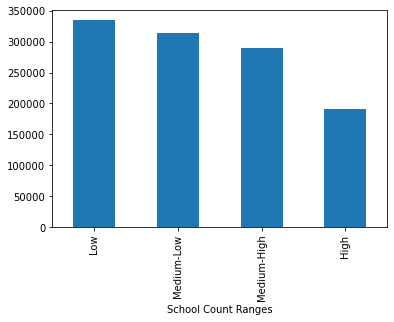

In [16]:
miami_school_groups.plot.bar()

In [ ]:
miami_months_df.plot.bar(x='month_sold',y='SALE_PRC')

miami_school_groups.plot.bar(x="")

DataFrame.plot.bar(x=None, y=None, **kwargs)